In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from agents import TSAgent,experiment,ArmedBanditsEnv,EpsilonGreedyAgent,UCBAgent

In [ ]:
def plotreg(regret,num_steps,num_slots,num_expts,probability_expts):
        plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
        
        for k in regret.keys():
            
            plt.plot(regret[k])

        plt.legend(regret.keys())
        plt.title(f"Testing algorithms on {num_steps} rounds over {num_slots} bandits")
        plt.ylabel(f"Avg Regret over {num_expts} realizations for {probability_expts} different probability sets")
        plt.xlabel("Steps")
        plt.show()

def run_prob_expts(num_expts,num_slots,num_steps,probability_expts,agents):
    overall_estimates = {}
    overall_regret = {}
    for k in agents.keys():
        overall_regret[k] = np.zeros(num_steps+1)
    overall_regret['Optimal'] = np.zeros(num_steps+1)  
    for i in range(probability_expts):
        probabilites = np.random.uniform(0,1,num_slots)
        #print(probabilites)
        p_values = np.tile(probabilites,(num_expts,1))
        
        env = ArmedBanditsEnv(p_values)
        exp = experiment(agents,env,num_expts,num_slots,num_steps)
        exp.run()
        for k in agents.keys():
         overall_regret[k] = overall_regret[k]+exp.regret[k]
    for k in agents.keys():
         overall_regret[k] = overall_regret[k]/10    
    #print(exp.estimates)
    plotreg(overall_regret,num_steps,num_slots,num_expts,probability_expts)        
    return overall_regret

In [21]:

num_steps = 10000
num_expts = 10
num_slots = 10


probabilites = np.array([0.9,0.9,0.9,0.9,0.9,0.1,0.1,0.1,0.1,0.1])

p_values = np.tile(probabilites,(num_expts,1))

env = ArmedBanditsEnv(p_values)
delta = 0
agents = {
    "Greedy" : EpsilonGreedyAgent(np.zeros((num_expts,num_slots)),0.0,delta),
    #"0.1eGreedy" : EpsilonGreedyAgent(np.zeros((num_expts,num_slots)),0.1,delta),
    "UCB" : UCBAgent(np.zeros((num_expts,num_slots)),np.zeros((num_expts,num_slots)),0.1,num_steps,1.0),
    "TS" : TSAgent(np.ones((num_expts,num_slots)),np.ones((num_expts,num_slots)))

}
exp = experiment(agents,env,num_expts,num_slots,num_steps)
exp.run()

100%|██████████| 10000/10000 [00:11<00:00, 850.61it/s]


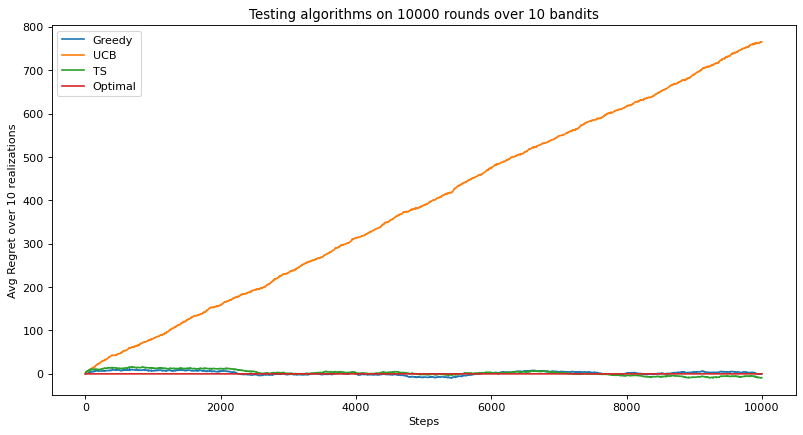

In [22]:
exp.plot()

In [23]:
exp.estimates

{'Greedy': array([ 7.80062871e-01,  8.59886604e-01,  7.55309709e-01,  8.37480819e-01,
         7.73494784e-01, -4.63143758e-07,  6.19045526e-02,  7.49995740e-02,
         2.49998125e-02,  1.99996843e-02]),
 'UCB': array([0.88926992, 0.89505539, 0.89350434, 0.88906811, 0.88264975,
        0.10158961, 0.10378952, 0.10057892, 0.10971027, 0.10288102]),
 'TS': array([0.88563016, 0.89204577, 0.89744721, 0.89334465, 0.89578751,
        0.27731567, 0.22676972, 0.22000917, 0.25259791, 0.25002828]),
 'Optimal': array([0.90000043, 0.9000001 , 0.89999954, 0.90000047, 0.90000027,
        0.1       , 0.10000028, 0.10000008, 0.09999966, 0.09999995])}